In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the data

In [3]:
sixth_sem = pd.read_excel('6th_Sem_Data.xls')
sixth_sem.head()

,Roll No,Name of the Student,Section,Prg_Elec_1,Prg_Elec_2,Inter_Disc_Elec_1,Core_1,Core_2,Core_3,Lab_1,Lab_2,Lab_3,GPA
0,3210316101,A LEELA PRASAD,A,A,B+,B+,B+,B+,B+,A+,A+,A,7.50
1,3210316102,AGILE VAMSIDHAR REDDY,A,B,F,P,F,F,F,A,B+,A,0.00
2,3210316103,ALAMPALLI VENKATA MONIKA,A,A,A+,A,A,A+,A+,O,O,O,8.83
3,3210316104,SHAIK ABDUL RAHEEM,A,B,B+,B,F,B,B,B+,B,P,0.00
4,3210316105,ACHYUTHA VISHNUTEJA,A,B,B,B+,C,P,P,B+,C,B+,5.46


In [4]:
sixth_sem.shape

(380, 13)

In [5]:
sixth_sem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Roll No              380 non-null    int64  
 1   Name of the Student  380 non-null    object 
 2   Section              380 non-null    object 
 3   Prg_Elec_1           380 non-null    object 
 4   Prg_Elec_2           380 non-null    object 
 5   Inter_Disc_Elec_1    380 non-null    object 
 6   Core_1               380 non-null    object 
 7   Core_2               380 non-null    object 
 8   Core_3               380 non-null    object 
 9   Lab_1                380 non-null    object 
 10  Lab_2                380 non-null    object 
 11  Lab_3                380 non-null    object 
 12  GPA                  380 non-null    float64
dtypes: float64(1), int64(1), object(11)
memory usage: 38.7+ KB


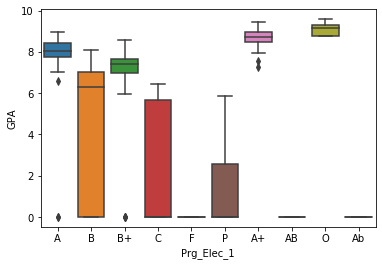

In [6]:
sns.boxplot(data = sixth_sem, x = 'Prg_Elec_1', y = 'GPA')

### Data Cleaning

Some of the values are repeated so cleaning them

In [7]:
sixth_sem.Prg_Elec_1.value_counts()

B+    97
B     84
A     77
F     50
A+    31
C     20
P     11
O      7
AB     2
Ab     1
Name: Prg_Elec_1, dtype: int64

In [8]:
sixth_sem.Prg_Elec_1 = sixth_sem.Prg_Elec_1.replace('Ab','AB')

In [9]:
sixth_sem.Prg_Elec_1.value_counts()

B+    97
B     84
A     77
F     50
A+    31
C     20
P     11
O      7
AB     3
Name: Prg_Elec_1, dtype: int64

In [10]:
sixth_sem.Inter_Disc_Elec_1.value_counts()

B+    120
B      86
A      85
A+     29
C      28
F      16
P      13
AB      2
 A      1
Name: Inter_Disc_Elec_1, dtype: int64

In [11]:
sixth_sem.Inter_Disc_Elec_1 = sixth_sem.Inter_Disc_Elec_1.replace(' A','A')

In [12]:
sixth_sem.Inter_Disc_Elec_1.value_counts()

B+    120
B      86
A      86
A+     29
C      28
F      16
P      13
AB      2
Name: Inter_Disc_Elec_1, dtype: int64

In [13]:
sixth_sem.Core_1.value_counts()

B     85
B+    85
A     58
P     39
A+    33
C     33
F     28
F     14
O      4
AB     1
Name: Core_1, dtype: int64

In [14]:
sixth_sem.Core_1 = sixth_sem.Core_1.replace('F ', 'F')

In [15]:
sixth_sem.Core_1.value_counts()

B     85
B+    85
A     58
F     42
P     39
A+    33
C     33
O      4
AB     1
Name: Core_1, dtype: int64

In [16]:
sixth_sem.Core_2.value_counts()

B     106
B+     87
A      55
F      50
C      38
P      23
A+     14
P       5
O       1
AB      1
Name: Core_2, dtype: int64

In [17]:
sixth_sem.Core_2 = sixth_sem.Core_2.replace('P ', 'P')

In [18]:
sixth_sem.Core_2.value_counts()

B     106
B+     87
A      55
F      50
C      38
P      28
A+     14
O       1
AB      1
Name: Core_2, dtype: int64

In [19]:
sixth_sem.Lab_1.value_counts()

A+    155
O     136
A      62
B+     17
P       5
B       3
A       1
C       1
Name: Lab_1, dtype: int64

In [20]:
sixth_sem.Lab_1 = sixth_sem.Lab_1.replace('A ', 'A')

In [21]:
sixth_sem.Lab_1.value_counts()

A+    155
O     136
A      63
B+     17
P       5
B       3
C       1
Name: Lab_1, dtype: int64

### EDA
The data set consists of only categorical values so bivariate analysis can be done across the target variable 'GPA' to get to know the spread and any outlier present.

#### Univariate Analysis

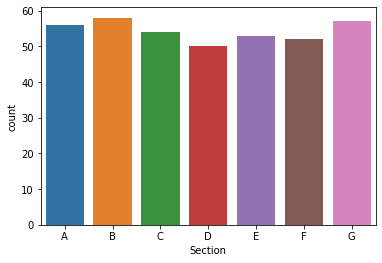

In [22]:
# Number students in each section
sns.countplot(sixth_sem.Section)

In [23]:
sub = ['Prg_Elec_1','Prg_Elec_2','Inter_Disc_Elec_1','Core_1','Core_2','Core_3','Lab_1','Lab_2','Lab_3']

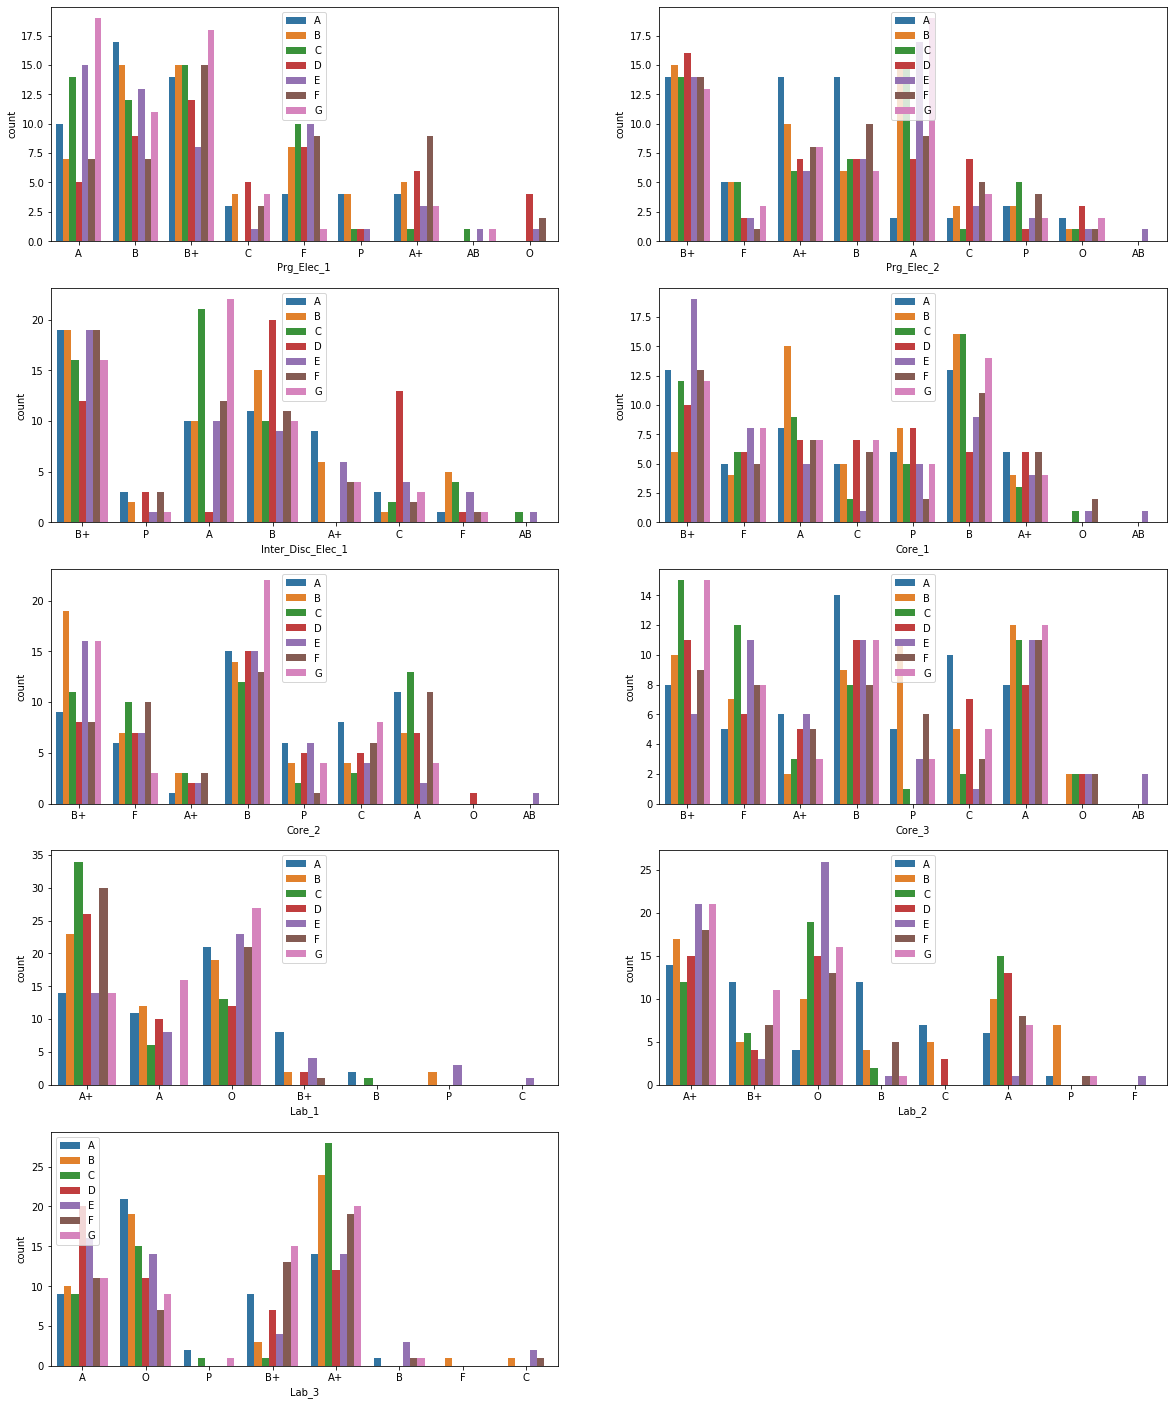

In [24]:
# Univariate Analysis
plt.figure(figsize = [20,25])
for i in range(0,9):
    plt.subplot(5,2,i+1)
    sns.countplot(sixth_sem[sub[i]], hue = sixth_sem.Section)
    plt.legend(loc = 'best')
plt.show()

#### Bivariate Analysis

In [25]:
sixth_sem.GPA.describe()

count    380.000000
mean       5.442053
std        3.475326
min        0.000000
25%        0.000000
50%        7.080000
75%        7.960000
max        9.580000
Name: GPA, dtype: float64

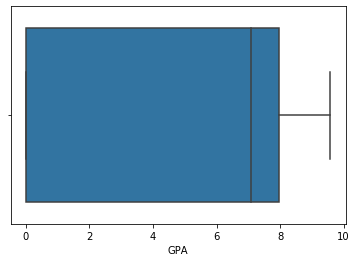

In [26]:
sns.boxplot(sixth_sem.GPA)

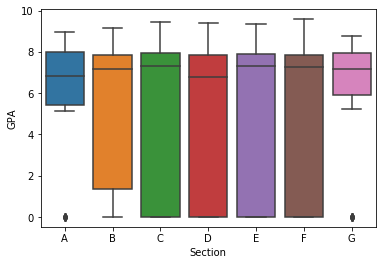

In [27]:
sns.boxplot(x = 'Section', y = 'GPA', data = sixth_sem)
plt.show()

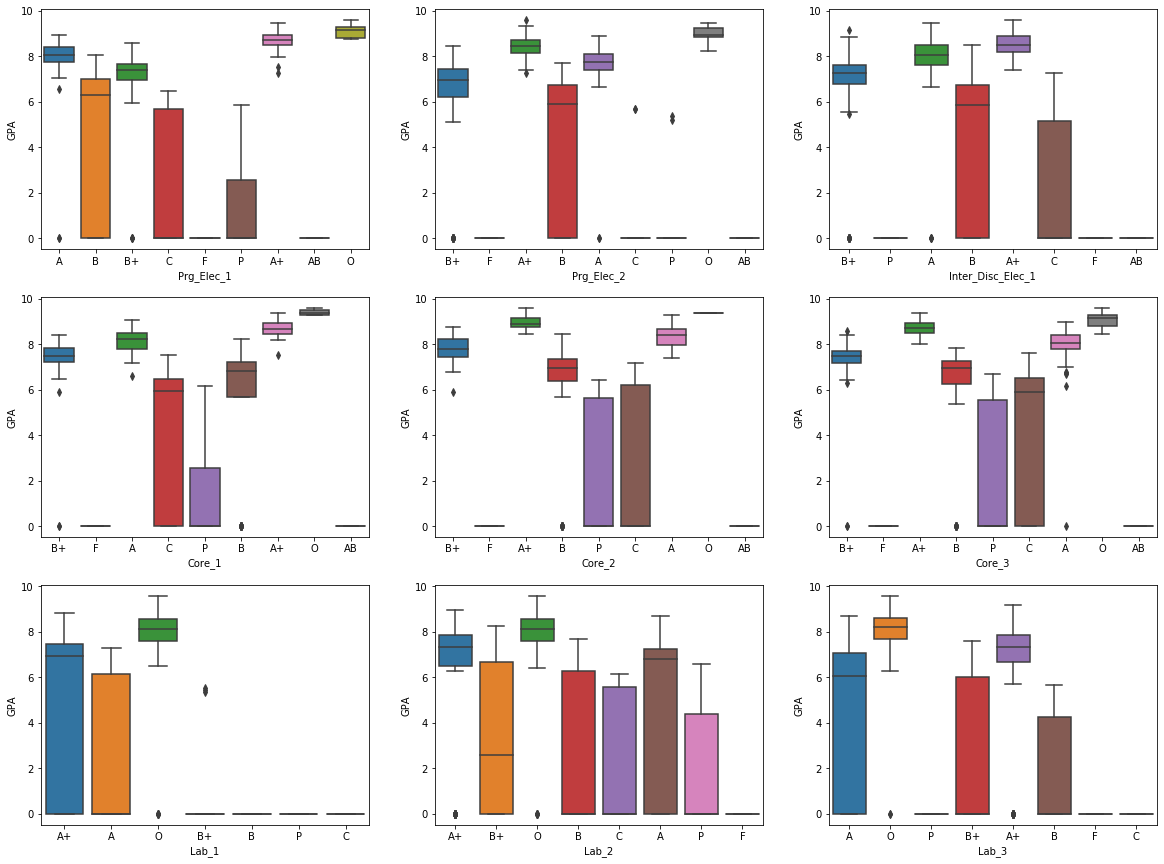

In [28]:

plt.figure(figsize = [20,15])
for i in range(0,9):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = sub[i], y = 'GPA', data = sixth_sem)
plt.show()

In [29]:
#sub.append('Section')
len(sub)

9

### Dummy Variable Creation

In [30]:
for i in sub:
    dummy = pd.get_dummies(sixth_sem[i], prefix = i, drop_first = True)
    sixth_sem = pd.concat([sixth_sem, dummy], 1)
    sixth_sem = sixth_sem.drop(i,1)
sixth_sem.head()

,Roll No,Name of the Student,Section,GPA,Prg_Elec_1_A+,Prg_Elec_1_AB,Prg_Elec_1_B,Prg_Elec_1_B+,Prg_Elec_1_C,Prg_Elec_1_F,...,Lab_2_F,Lab_2_O,Lab_2_P,Lab_3_A+,Lab_3_B,Lab_3_B+,Lab_3_C,Lab_3_F,Lab_3_O,Lab_3_P
0,3210316101,A LEELA PRASAD,A,7.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3210316102,AGILE VAMSIDHAR REDDY,A,0.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3210316103,ALAMPALLI VENKATA MONIKA,A,8.83,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,3210316104,SHAIK ABDUL RAHEEM,A,0.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3210316105,ACHYUTHA VISHNUTEJA,A,5.46,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
# Splitting data into X and y

y = sixth_sem.GPA
y

0      7.50
1      0.00
2      8.83
3      0.00
4      5.46
       ... 
375    0.00
376    7.88
377    8.46
378    0.00
379    0.00
Name: GPA, Length: 380, dtype: float64

In [32]:
X = sixth_sem.drop(['Roll No', 'Name of the Student','Section', 'GPA'], 1)
X.head()

,Prg_Elec_1_A+,Prg_Elec_1_AB,Prg_Elec_1_B,Prg_Elec_1_B+,Prg_Elec_1_C,Prg_Elec_1_F,Prg_Elec_1_O,Prg_Elec_1_P,Prg_Elec_2_A+,Prg_Elec_2_AB,...,Lab_2_F,Lab_2_O,Lab_2_P,Lab_3_A+,Lab_3_B,Lab_3_B+,Lab_3_C,Lab_3_F,Lab_3_O,Lab_3_P
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
# dividing the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state  = 100)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(266, 67)
(114, 67)
(266,)
(114,)


### Building Linear Model

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
lm0 = LinearRegression()
lm0.fit(X_train, y_train)
rfe = RFE(lm0, 15)
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Prg_Elec_1_A+', False, 35),
 ('Prg_Elec_1_AB', False, 50),
 ('Prg_Elec_1_B', False, 17),
 ('Prg_Elec_1_B+', False, 42),
 ('Prg_Elec_1_C', False, 22),
 ('Prg_Elec_1_F', True, 1),
 ('Prg_Elec_1_O', False, 33),
 ('Prg_Elec_1_P', True, 1),
 ('Prg_Elec_2_A+', False, 40),
 ('Prg_Elec_2_AB', False, 34),
 ('Prg_Elec_2_B', False, 19),
 ('Prg_Elec_2_B+', False, 20),
 ('Prg_Elec_2_C', False, 4),
 ('Prg_Elec_2_F', False, 16),
 ('Prg_Elec_2_O', False, 41),
 ('Prg_Elec_2_P', False, 10),
 ('Inter_Disc_Elec_1_A+', False, 49),
 ('Inter_Disc_Elec_1_AB', True, 1),
 ('Inter_Disc_Elec_1_B', False, 37),
 ('Inter_Disc_Elec_1_B+', False, 46),
 ('Inter_Disc_Elec_1_C', False, 36),
 ('Inter_Disc_Elec_1_F', True, 1),
 ('Inter_Disc_Elec_1_P', False, 48),
 ('Core_1_A+', False, 43),
 ('Core_1_AB', False, 38),
 ('Core_1_B', False, 24),
 ('Core_1_B+', False, 47),
 ('Core_1_C', False, 23),
 ('Core_1_F', True, 1),
 ('Core_1_O', False, 11),
 ('Core_1_P', True, 1),
 ('Core_2_A+', False, 44),
 ('Core_2_AB', False, 39),


In [38]:
col_sel = X_train.columns[rfe.support_]
col_sel

Index(['Prg_Elec_1_F', 'Prg_Elec_1_P', 'Inter_Disc_Elec_1_AB',
       'Inter_Disc_Elec_1_F', 'Core_1_F', 'Core_1_P', 'Core_2_B', 'Core_2_C',
       'Core_2_F', 'Core_2_P', 'Core_3_AB', 'Core_3_F', 'Core_3_P', 'Lab_1_B',
       'Lab_3_P'],
      dtype='object')

In [39]:
X_train_rfe = X_train[col_sel]

In [40]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

lm0 = sm.OLS(y_train, X_train_rfe).fit()
lm0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     99.33
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           4.80e-96
Time:                        16:21:25   Log-Likelihood:                -453.22
No. Observations:                 266   AIC:                             938.4
Df Residuals:                     250   BIC:                             995.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.0926      0.134     60.462      0.000       7.829       8.356
Prg_Elec_1_F            -1.7493      0.352     -4.967      0.000      -2.443      -1.056
Prg_Elec_1_P            -1.6882      0.601     -2.811      0.005      -2.871      -0.505
Inter_Disc_Elec_1_AB     3.2323      1.429      2.262      0.025       0.418       6.046
Inter_Disc_Elec_1_F      2.0970      0.513      4.084      0.000       1.086       3.108
Core_1_F                -2.7010      0.361     -7.487      0.000      -3.411      -1.991
Core_1_P                -1.4413      0.331     -4.351      0.000      -2.094      -0.789
Core_2_B                -1.5021      0.212     -7.092      0.000      -1.919      -1.085
Core_2_C                -3.1237      0.353     -8.851      0.000      -3.819      -2.429
Core_2_F                -3.8272      0.419     -9.142      0.000      -4.652      -3.003
Core_2_P                -2.0189      0.400     -5.043      0.000      -2.807      -1.230
Core_3_AB               -1.9121      1.477     -1.295      0.197      -4.821       0.997
Core_3_F                -3.0474      0.321     -9.482      0.000      -3.680      -2.414
Core_3_P                -1.9533      0.357     -5.478      0.000      -2.656      -1.251
Lab_1_B                  3.0616      1.188      2.577      0.011       0.722       5.402
Lab_3_P                 -1.7556      1.175     -1.494      0.136      -4.069       0.558
==============================================================================
Omnibus:                       63.268   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.352
Skew:                          -1.163   Prob(JB):                     2.46e-30
Kurtosis:                       5.626   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Drop Core_3_AB as p-value = 0.197
X_train_new = X_train_rfe.drop('Core_3_AB',1)

In [42]:
lm1 = sm.add_constant(X_train_new)
lm1 = sm.OLS(y_train, X_train_new).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     106.0
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           1.05e-96
Time:                        16:21:26   Log-Likelihood:                -454.11
No. Observations:                 266   AIC:                             938.2
Df Residuals:                     251   BIC:                             992.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.0926      0.134     60.381      0.000       7.829       8.357
Prg_Elec_1_F            -1.7692      0.352     -5.021      0.000      -2.463      -1.075
Prg_Elec_1_P            -1.6634      0.601     -2.767      0.006      -2.847      -0.480
Inter_Disc_Elec_1_AB     3.2614      1.431      2.280      0.023       0.444       6.079
Inter_Disc_Elec_1_F      1.9464      0.501      3.887      0.000       0.960       2.933
Core_1_F                -2.7503      0.359     -7.657      0.000      -3.458      -2.043
Core_1_P                -1.4407      0.332     -4.343      0.000      -2.094      -0.787
Core_2_B                -1.5096      0.212     -7.121      0.000      -1.927      -1.092
Core_2_C                -3.1439      0.353     -8.905      0.000      -3.839      -2.449
Core_2_F                -3.8710      0.418     -9.264      0.000      -4.694      -3.048
Core_2_P                -2.0388      0.401     -5.089      0.000      -2.828      -1.250
Core_3_F                -2.9636      0.315     -9.402      0.000      -3.584      -2.343
Core_3_P                -1.9029      0.355     -5.361      0.000      -2.602      -1.204
Lab_1_B                  3.1624      1.187      2.664      0.008       0.824       5.500
Lab_3_P                 -1.7485      1.176     -1.486      0.138      -4.065       0.568
==============================================================================
Omnibus:                       61.140   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.760
Skew:                          -1.139   Prob(JB):                     1.81e-28
Kurtosis:                       5.518   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Drop Lab_3_P as p-value=0.138
X_train_new = X_train_new.drop('Lab_3_P',1)

lm2 = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train, X_train_new).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           2.86e-97
Time:                        16:21:26   Log-Likelihood:                -455.27
No. Observations:                 266   AIC:                             938.5
Df Residuals:                     252   BIC:                             988.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.0926      0.134     60.237      0.000       7.828       8.357
Prg_Elec_1_F            -1.7129      0.351     -4.878      0.000      -2.404      -1.021
Prg_Elec_1_P            -1.6328      0.602     -2.712      0.007      -2.819      -0.447
Inter_Disc_Elec_1_AB     3.1921      1.433      2.227      0.027       0.369       6.015
Inter_Disc_Elec_1_F      1.8223      0.495      3.682      0.000       0.847       2.797
Core_1_F                -2.7215      0.360     -7.569      0.000      -3.430      -2.013
Core_1_P                -1.4895      0.331     -4.502      0.000      -2.141      -0.838
Core_2_B                -1.5076      0.213     -7.094      0.000      -1.926      -1.089
Core_2_C                -3.1276      0.354     -8.842      0.000      -3.824      -2.431
Core_2_F                -3.8408      0.418     -9.181      0.000      -4.665      -3.017
Core_2_P                -2.1216      0.398     -5.335      0.000      -2.905      -1.338
Core_3_F                -3.0095      0.314     -9.571      0.000      -3.629      -2.390
Core_3_P                -1.8975      0.356     -5.333      0.000      -2.598      -1.197
Lab_1_B                  2.2810      1.031      2.213      0.028       0.251       4.311
==============================================================================
Omnibus:                       60.430   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.413
Skew:                          -1.133   Prob(JB):                     9.64e-28
Kurtosis:                       5.468   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Drop Lab_1_B as p-value=0.028
X_train_new = X_train_new.drop('Lab_1_B',1)

lm3 = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train, X_train_new).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.7
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           2.82e-97
Time:                        16:21:26   Log-Likelihood:                -457.83
No. Observations:                 266   AIC:                             941.7
Df Residuals:                     253   BIC:                             988.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.0926      0.135     59.778      0.000       7.826       8.359
Prg_Elec_1_F            -1.6595      0.353     -4.701      0.000      -2.355      -0.964
Prg_Elec_1_P            -1.6789      0.606     -2.768      0.006      -2.873      -0.485
Inter_Disc_Elec_1_AB     2.9636      1.441      2.057      0.041       0.127       5.800
Inter_Disc_Elec_1_F      1.8591      0.498      3.730      0.000       0.877       2.841
Core_1_F                -2.6172      0.359     -7.287      0.000      -3.325      -1.910
Core_1_P                -1.5273      0.333     -4.587      0.000      -2.183      -0.872
Core_2_B                -1.5137      0.214     -7.069      0.000      -1.935      -1.092
Core_2_C                -3.1609      0.356     -8.876      0.000      -3.862      -2.460
Core_2_F                -3.8131      0.421     -9.049      0.000      -4.643      -2.983
Core_2_P                -2.1624      0.400     -5.402      0.000      -2.951      -1.374
Core_3_F                -2.9663      0.316     -9.380      0.000      -3.589      -2.343
Core_3_P                -1.9125      0.358     -5.336      0.000      -2.618      -1.207
==============================================================================
Omnibus:                       60.486   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.676
Skew:                          -1.137   Prob(JB):                     1.39e-27
Kurtosis:                       5.447   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Drop Inter_Disc_Elec_1_AB as p-value=0.041
X_train_new = X_train_new.drop('Inter_Disc_Elec_1_AB',1)

lm4 = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train, X_train_new).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     129.6
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           1.95e-97
Time:                        16:21:26   Log-Likelihood:                -460.04
No. Observations:                 266   AIC:                             944.1
Df Residuals:                     254   BIC:                             987.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   8.0926      0.136     59.401      0.000       7.824       8.361
Prg_Elec_1_F           -1.6100      0.354     -4.543      0.000      -2.308      -0.912
Prg_Elec_1_P           -1.6927      0.610     -2.774      0.006      -2.894      -0.491
Inter_Disc_Elec_1_F     1.7039      0.496      3.436      0.001       0.727       2.680
Core_1_F               -2.5257      0.359     -7.042      0.000      -3.232      -1.819
Core_1_P               -1.5479      0.335     -4.622      0.000      -2.207      -0.888
Core_2_B               -1.5205      0.215     -7.057      0.000      -1.945      -1.096
Core_2_C               -3.1873      0.358     -8.899      0.000      -3.893      -2.482
Core_2_F               -3.7717      0.424     -8.905      0.000      -4.606      -2.938
Core_2_P               -2.2049      0.402     -5.481      0.000      -2.997      -1.413
Core_3_F               -2.9334      0.318     -9.229      0.000      -3.559      -2.307
Core_3_P               -1.9195      0.361     -5.322      0.000      -2.630      -1.209
==============================================================================
Omnibus:                       60.815   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.133
Skew:                          -1.148   Prob(JB):                     1.83e-27
Kurtosis:                       5.416   Cond. No.                         8.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Drop Prg_Elec_1_P as p-value=0.006
X_train_new = X_train_new.drop('Prg_Elec_1_P',1)

lm5 = sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train, X_train_new).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     138.2
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           6.97e-97
Time:                        16:21:26   Log-Likelihood:                -464.01
No. Observations:                 266   AIC:                             950.0
Df Residuals:                     255   BIC:                             989.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   8.0926      0.138     58.637      0.000       7.821       8.364
Prg_Elec_1_F           -1.4113      0.352     -4.014      0.000      -2.104      -0.719
Inter_Disc_Elec_1_F     1.6119      0.501      3.216      0.001       0.625       2.599
Core_1_F               -2.7123      0.357     -7.599      0.000      -3.415      -2.009
Core_1_P               -1.6083      0.339     -4.750      0.000      -2.275      -0.942
Core_2_B               -1.5447      0.218     -7.083      0.000      -1.974      -1.115
Core_2_C               -3.2480      0.362     -8.969      0.000      -3.961      -2.535
Core_2_F               -3.7955      0.429     -8.848      0.000      -4.640      -2.951
Core_2_P               -2.2263      0.407     -5.464      0.000      -3.029      -1.424
Core_3_F               -2.9630      0.322     -9.207      0.000      -3.597      -2.329
Core_3_P               -2.0754      0.361     -5.750      0.000      -2.786      -1.365
==============================================================================
Omnibus:                       58.549   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.729
Skew:                          -1.122   Prob(JB):                     1.22e-25
Kurtosis:                       5.305   Cond. No.                         8.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Drop Inter_Disc_Elec_1_F as p-value=0.001
X_train_new = X_train_new.drop('Inter_Disc_Elec_1_F',1)

lm6 = sm.add_constant(X_train_new)
lm6 = sm.OLS(y_train, X_train_new).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     147.0
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           8.61e-96
Time:                        16:21:26   Log-Likelihood:                -469.30
No. Observations:                 266   AIC:                             958.6
Df Residuals:                     256   BIC:                             994.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.0926      0.141     57.595      0.000       7.816       8.369
Prg_Elec_1_F    -1.2770      0.355     -3.593      0.000      -1.977      -0.577
Core_1_F        -2.4522      0.354     -6.929      0.000      -3.149      -1.755
Core_1_P        -1.5780      0.345     -4.580      0.000      -2.256      -0.899
Core_2_B        -1.5703      0.222     -7.077      0.000      -2.007      -1.133
Core_2_C        -3.2956      0.368     -8.946      0.000      -4.021      -2.570
Core_2_F        -3.5726      0.431     -8.289      0.000      -4.421      -2.724
Core_2_P        -2.3822      0.412     -5.784      0.000      -3.193      -1.571
Core_3_F        -2.9050      0.327     -8.881      0.000      -3.549      -2.261
Core_3_P        -2.0421      0.367     -5.560      0.000      -2.765      -1.319
==============================================================================
Omnibus:                       61.942   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.223
Skew:                          -1.179   Prob(JB):                     1.75e-27
Kurtosis:                       5.358   Cond. No.                         8.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Core_2_F,2.92
0,const,2.53
1,Prg_Elec_1_F,2.07
8,Core_3_F,1.93
7,Core_2_P,1.65
2,Core_1_F,1.61
3,Core_1_P,1.48
5,Core_2_C,1.48
9,Core_3_P,1.37
4,Core_2_B,1.29


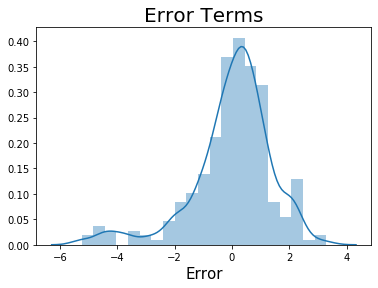

In [49]:
# To check error terms are normally distributed

y_train_pred = lm6.predict(X_train_new)

sns.distplot((y_train - y_train_pred))
plt.title('Error Terms', fontsize =20)
plt.xlabel('Error', fontsize = 15)
plt.show()

In [50]:
cols = X_train_new.columns
cols

Index(['const', 'Prg_Elec_1_F', 'Core_1_F', 'Core_1_P', 'Core_2_B', 'Core_2_C',
       'Core_2_F', 'Core_2_P', 'Core_3_F', 'Core_3_P'],
      dtype='object')

In [51]:
X_test_lm = sm.add_constant(X_test)

X_test_lm = X_test_lm[cols]

In [52]:
y_test_pred = lm6.predict(X_test_lm)

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.705940083609619

In [54]:
r2_score(y_train, y_train_pred)

0.8378603187310999

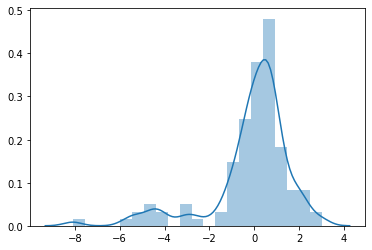

In [55]:
sns.distplot(y_test-y_test_pred)